### Desafios:
****************************************************************************************************************************
##### 1 - Realizar a média da metragem para cada um dos bairros (Paulo)

##### 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

##### 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

##### 4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

##### 5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [2]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#Download dos dados
url = 'https://raw.githubusercontent.com/dailys-maite-data-scientist/Imersao_dados_Alura4/main/dados.csv'
dados = pd.read_csv(url)

In [3]:
# 1- Média da metragem por bairro
dados_medias = dados.groupby(['Bairro'], as_index=False)['Metragem'].mean()
dados_medias = round(dados_medias, 2)
dados_medias = dados_medias.rename(columns= {"Metragem": "Media_metragem"})
dados_medias

,Bairro,Media_metragem
0,Aclimação,253.06
1,Alto da Boa Vista,418.88
2,Alto da Lapa,294.34
3,Alto da Mooca,270.05
4,Alto de Pinheiros,433.44
...,...,...
696,Vila Água Funda,152.20
697,Água Branca,191.00
698,Água Fria,165.42
699,Água Funda,139.00


In [4]:
#Ordenar as médias
dados_medias_ordenados = dados_medias.sort_values(by="Media_metragem", ascending=False)
dados_medias_ordenados

,Bairro,Media_metragem
426,Sítio Represa,37000.00
487,Vila Castelo,2850.00
170,Jardim Guedala,2486.64
309,Jardim das Camélias,1700.00
40,Chácara Flora,1260.73
...,...,...
53,Cidade Antônio Estevão de Carvalho,57.50
215,Jardim Nova Germania,57.00
115,Jardim Benfica,48.00
559,Vila Leonor,46.00


In [5]:
# 2- Duas formas de selecionar os dados por bairro
#Usando Query
dados.query(" Bairro == 'Aclimação'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


In [6]:
# Segunda forma
dados[dados['Bairro'] == 'Aclimação']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


<AxesSubplot:xlabel='Bairro'>

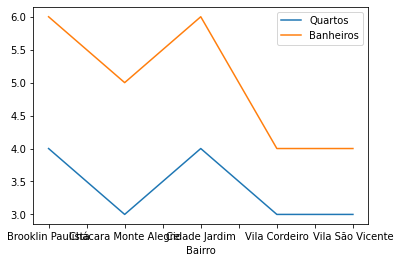

In [7]:
#Explorar outros gráficos com alguma conclusão
dados[['Bairro','Quartos', 'Banheiros']].sample(5).groupby('Bairro').mean().plot.line()

<AxesSubplot:xlabel='Bairro'>

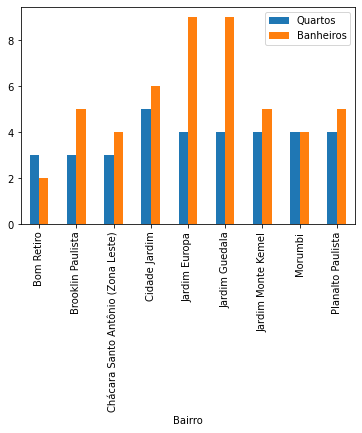

In [8]:
dados[['Bairro','Quartos', 'Banheiros']].sample(10).groupby('Bairro').max().plot.bar()

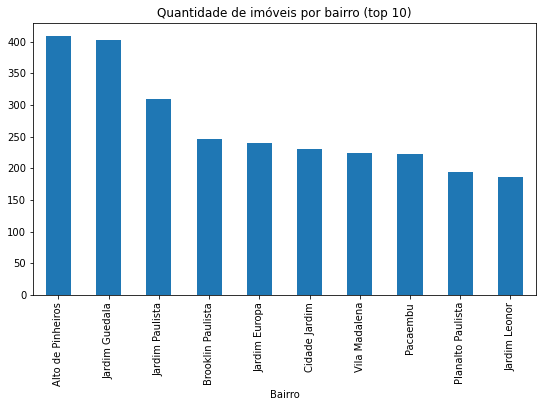

In [9]:
#Quantidade de imoveis por bairro
plt.figure(figsize=(9,5))
plt.title('Quantidade de imóveis por bairro (top 10)')
dados['Bairro'].value_counts().head(10).plot.bar()
plt.xlabel('Bairro')
plt.show()

Visualização da quantidade de imóveis para os 10 bairros com mais imóveis. (Todos tem mais de 150)

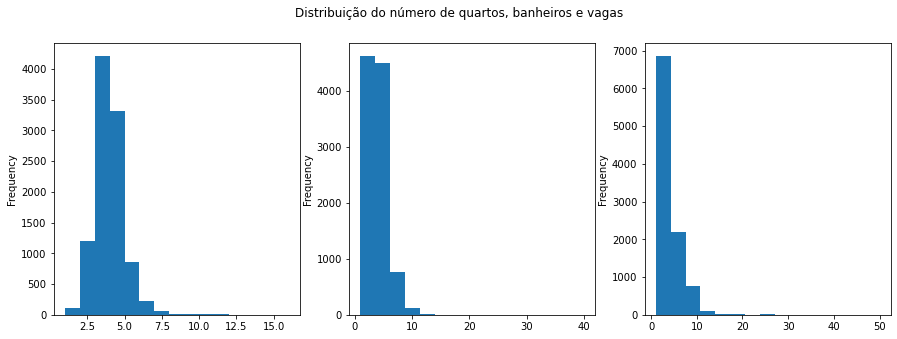

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle('Distribuição do número de quartos, banheiros e vagas')
dados['Quartos'].plot.hist(ax=ax[0], bins=15)
dados['Banheiros'].plot.hist(ax=ax[1], bins=15)
dados['Vagas'].plot.hist(ax=ax[2], bins=15)
plt.show()

Podemos ver que temos muito mais imóveis entre 2.5 e 8 quartos, até 5 banheiro e até 5 vagas.

In [11]:
#Estatísticas dos dados, média, mediana, mim, max
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [12]:
# 5- Descobrir quais são os bairros que não tem nome de Rua
# quantos dados faltantes em Rua nós temos?
dados['Rua'].isnull().value_counts()

False    6574
True     3434
Name: Rua, dtype: int64

In [13]:
# Ruas faltantes por bairro
dados[dados['Rua'].isnull()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64